In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def log_model(z, mean=[0,0], cov=[[1,0.9],[0.9,1]]):
    #todo
    # Banana distribution
    # todo det
    return -1/2*math.log((2*math.pi)**2*0.19) - 1/2*np.matmul(np.transpose(z-mean), np.matmul(cov,(z-mean)))

def grad_log_model(z, mean=[0,0], cov=np.array([[1,0.9],[0.9,1]])):
    # todo
    # Banana distirbution
    return -np.linalg.solve(cov, np.transpose(z))

def reparam_mean(eps, theta):
    # todo
    return theta + eps[:,:-1]

def reparam_func(eps, u, theta):
    theta_sd = theta[-1]
    theta_mean = theta[:-1]
    return reparam_mean(eps,theta_mean) + theta_sd*u

def grad_reparam_mean(eps, theta):
    return np.ones(2)

def grad_reparam_sd(eps, theta):
    return np.ones(1)
    
def log_var(x, theta):
    #todo
    return -1/2*math.log(2*math.pi) - 1/2*(x-theta)**2

def grad_log_var(z, eps, theta):
    theta_sd = theta[-1]
    theta_mean = theta[:-1]
    return -np.matmul(np.eye(2)/theta_sd**2, np.transpose(z-reparam_mean(eps,theta_mean)))
    
def grad_elbo(theta):
    # todo
    d = len(theta)
    n = 1
    eps = np.random.multivariate_normal(np.zeros(3), np.eye(3), n)
    u = np.random.multivariate_normal(np.zeros(2), np.eye(2), n)
    #z = sample_var(n, theta, eps)
    z = reparam_func(eps, u, theta)
    
    # mcmc
    eps2 = eps #todo
    
    grad_model = np.repeat(np.sum(grad_log_model(z)),d) * np.array([1,1,np.asscalar(np.sum(u,axis=1))])
    grad_entr = - np.repeat(np.sum(grad_log_var(z,eps2,theta)),d) * np.array([1,1,np.asscalar(np.sum(u,axis=1))]) # *grad_h
    return grad_model + grad_entr
    
def optimize_elbo(init, step, iter=50):
    theta = init
    elbo = np.zeros(iter)
    d = len(init)
    thetas = np.zeros((iter, d))
    for i in range(iter):
        theta = theta + step/math.sqrt(i+1) * grad_elbo(theta)
        thetas[i,:] = theta
    return theta, thetas

def sample_var(n, theta):
    eps = np.random.multivariate_normal(np.zeros(3), np.eye(3), n)
    u = np.random.multivariate_normal(np.zeros(2), np.eye(2), n)
    z = reparam_func(eps, u, theta)
    return z

<ipython-input-109-e97dd21318d9>:48: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  grad_model = np.repeat(np.sum(grad_log_model(z)),d) * np.array([1,1,np.asscalar(np.sum(u,axis=1))])
<ipython-input-109-e97dd21318d9>:49: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  grad_entr = - np.repeat(np.sum(grad_log_var(z,eps2,theta)),d) * np.array([1,1,np.asscalar(np.sum(u,axis=1))]) # *grad_h


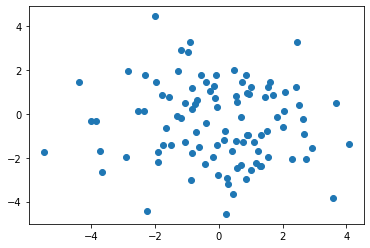

In [110]:
theta, thetas = optimize_elbo(np.append(np.random.multivariate_normal(np.zeros(2),np.eye(2),1), 1), step=1, iter=1000)
z = sample_var(100, theta)
plt.scatter(z[:,0],z[:,1])

In [111]:
thetas

array([[ 0.60739121,  0.03862267,  1.55465435],
       [ 0.17198035, -0.3967882 ,  1.41925196],
       [ 0.49625485, -0.0725137 ,  1.59069356],
       ...,
       [ 0.25064254, -0.318126  ,  1.44339289],
       [ 0.26101145, -0.30775709,  1.44150924],
       [ 0.31150406, -0.25726449,  1.50085124]])

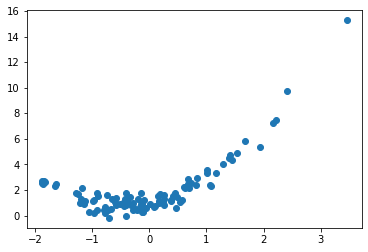

In [92]:
ss = np.random.multivariate_normal(np.zeros(2), [[1,0.9],[0.9,1]], 100)
plt.scatter(ss[:,0],ss[:,1]+ss[:,0]**2+1)

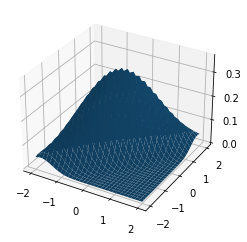

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-2.0:2.0:30j, -2.0:2.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

#sigma = np.array([.5, .5])
#covariance = np.diag(sigma**2)
covariance = np.array([[1,0.9],[0.9,1]])

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)



fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)

plt.show()